In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
import matplotlib.pyplot as plt
%matplotlib inline

#Data Preparation

In [3]:
player_df = pd.read_csv("data.csv")

In [4]:
numcols = [
 'Overall',
 'Potential',
'Crossing','Finishing',  'ShortPassing',  'Dribbling','LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility',  'Stamina',
 'Value','Wage']

In [5]:
catcols = ['Name','Club','Nationality','Preferred Foot','Position','Body Type']

In [6]:
# Subset the columns
player_df = player_df[numcols+ catcols]

In [7]:
# Few rows of data
player_df.head(5)

,Overall,Potential,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Value,Wage,Name,Club,Nationality,Preferred Foot,Position,Body Type
0,94,94,84.0,95.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,€110.5M,€565K,L. Messi,FC Barcelona,Argentina,Left,RF,Messi
1,94,94,84.0,94.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,€77M,€405K,Cristiano Ronaldo,Juventus,Portugal,Right,ST,C. Ronaldo
2,92,93,79.0,87.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,€118.5M,€290K,Neymar Jr,Paris Saint-Germain,Brazil,Right,LW,Neymar
3,91,93,17.0,13.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,€72M,€260K,De Gea,Manchester United,Spain,Right,GK,Lean
4,91,92,93.0,82.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,€102M,€355K,K. De Bruyne,Manchester City,Belgium,Right,RCM,Normal


In [8]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall         18207 non-null  int64  
 1   Potential       18207 non-null  int64  
 2   Crossing        18159 non-null  float64
 3   Finishing       18159 non-null  float64
 4   ShortPassing    18159 non-null  float64
 5   Dribbling       18159 non-null  float64
 6   LongPassing     18159 non-null  float64
 7   BallControl     18159 non-null  float64
 8   Acceleration    18159 non-null  float64
 9   SprintSpeed     18159 non-null  float64
 10  Agility         18159 non-null  float64
 11  Stamina         18159 non-null  float64
 12  Value           18207 non-null  object 
 13  Wage            18207 non-null  object 
 14  Name            18207 non-null  object 
 15  Club            17966 non-null  object 
 16  Nationality     18207 non-null  object 
 17  Preferred Foot  18159 non-null 

#Numerical Correlation with Graphs

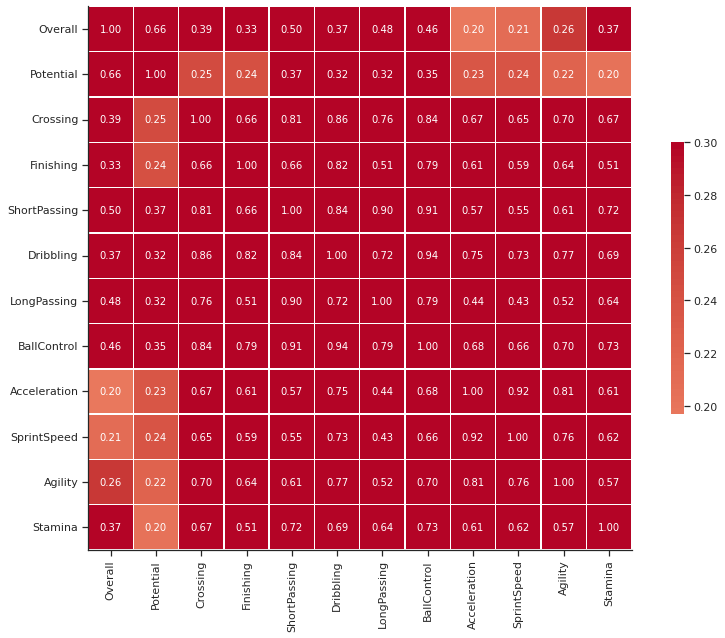

In [9]:
#Numerical Correlation with Graphs
corr = player_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

#Sub divided Bar Diagrams or Stacked plots

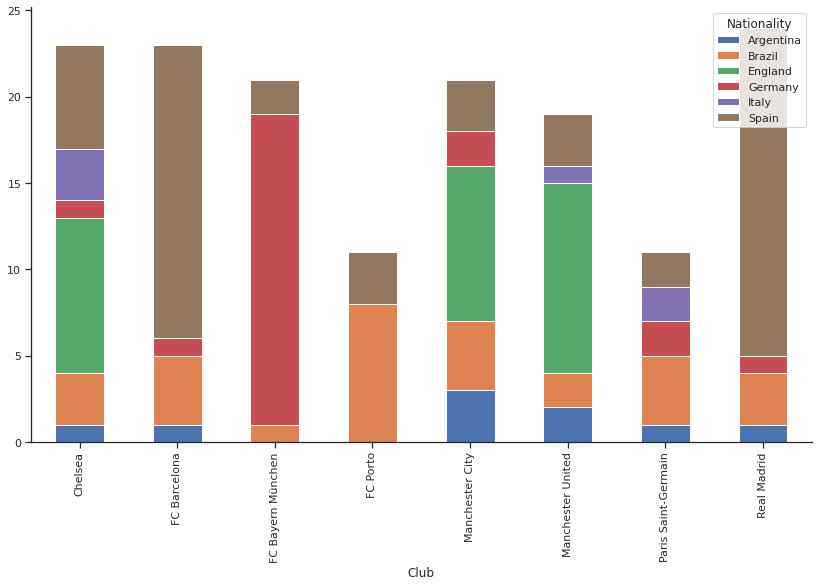

In [10]:
sns.set(style="ticks")

filtered_player_df = player_df[(player_df['Club'].isin(['FC Barcelona', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid','FC Porto','FC Bayern München'])) & 
                      (player_df['Nationality'].isin(['England', 'Brazil', 'Argentina',
       'Brazil', 'Italy','Spain','Germany'])) 
                     ]

df_plot = filtered_player_df.groupby(['Club', 'Nationality']).size().reset_index().pivot(columns='Club', index='Nationality', values=0).reset_index()

g = df_plot.set_index('Nationality').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

#Pairplots

In [11]:
def wage_split(x):
    try:
        return int(x.split("K")[0][1:])
    except:
        return 0

player_df['Wage'] = player_df['Wage'].apply(lambda x : wage_split(x))

In [15]:
def value_split(x):
    try:
        if 'M' in x:
            return float(x.split("M")[0][1:])
        elif 'K' in x:
            return float(x.split("K")[0][1:])/1000
    except:
        return 0

player_df['Value'] = player_df['Value'].apply(lambda x : value_split(x))

In [16]:
player_df.head()

,Overall,Potential,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Value,Wage,Name,Club,Nationality,Preferred Foot,Position,Body Type
0,94,94,84.0,95.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,0,565,L. Messi,FC Barcelona,Argentina,Left,RF,Messi
1,94,94,84.0,94.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,0,405,Cristiano Ronaldo,Juventus,Portugal,Right,ST,C. Ronaldo
2,92,93,79.0,87.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,0,290,Neymar Jr,Paris Saint-Germain,Brazil,Right,LW,Neymar
3,91,93,17.0,13.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,0,260,De Gea,Manchester United,Spain,Right,GK,Lean
4,91,92,93.0,82.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,0,355,K. De Bruyne,Manchester City,Belgium,Right,RCM,Normal


#Pairplots

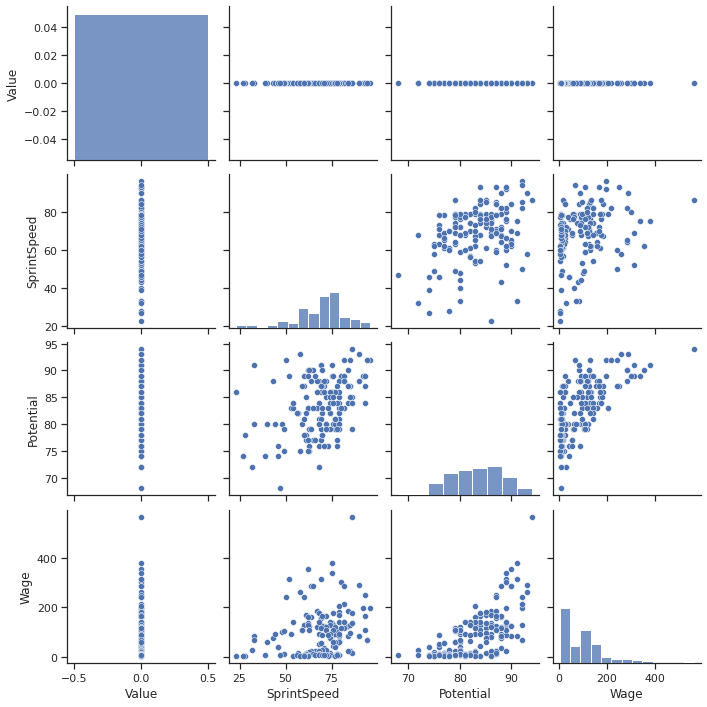

In [17]:
filtered_player_df = player_df[(player_df['Club'].isin(['FC Barcelona', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid','FC Porto','FC Bayern München'])) & 
                      (player_df['Nationality'].isin(['England', 'Brazil', 'Argentina',
       'Brazil', 'Italy','Spain','Germany'])) 
                     ]
# Single line to create pairplot
g = sns.pairplot(filtered_player_df[['Value','SprintSpeed','Potential','Wage']])

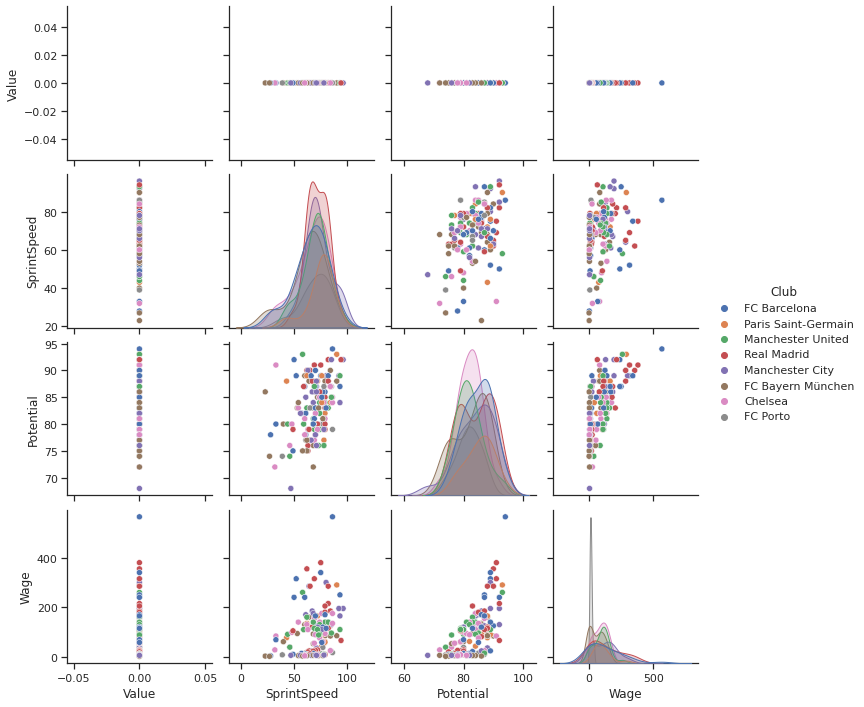

In [18]:
g = sns.pairplot(filtered_player_df[['Value','SprintSpeed','Potential','Wage','Club']],hue = 'Club')

#SwarmPlots

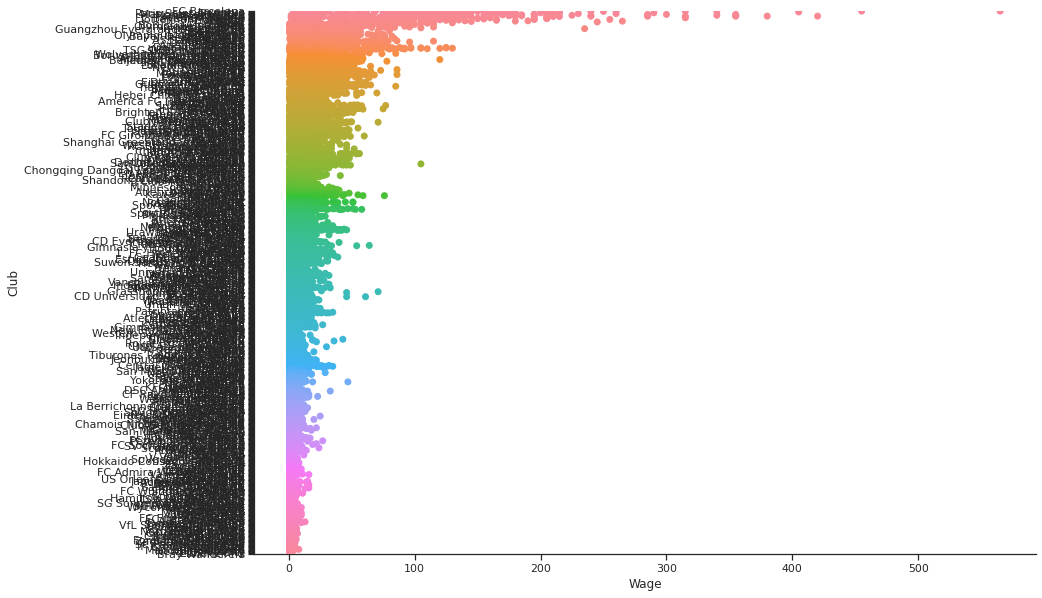

In [19]:
#SwarmPlots

g = sns.swarmplot(y = "Club",
              x = 'Wage', 
              data = player_df,
              # Decrease the size of the points to avoid crowding 
              size = 7)
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

#BoxPlot

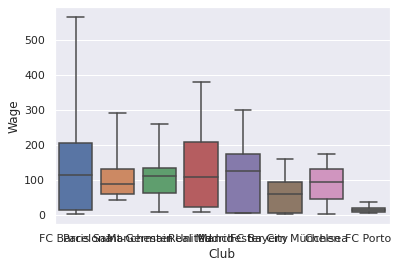

In [27]:
g = sns.boxplot(y = "Wage",
              x = 'Club', 
              data = filtered_player_df, whis=np.inf)

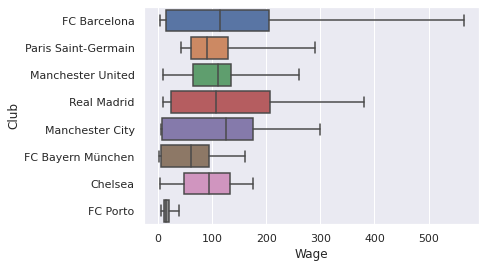

In [24]:
g = sns.boxplot(y = "Club",
              x = 'Wage', 
              data = filtered_player_df, whis=np.inf)

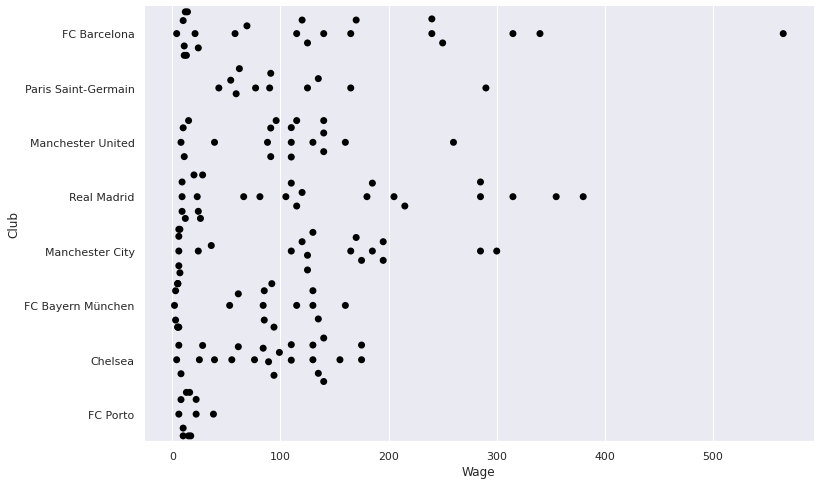

In [25]:
g = sns.swarmplot(y = "Club",
              x = 'Wage', 
              data = filtered_player_df,
              # Decrease the size of the points to avoid crowding 
              size = 7,color = 'black')
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

#scatterplot

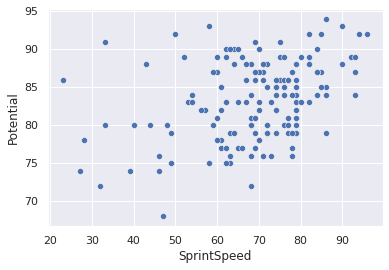

In [26]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot('SprintSpeed','Potential', data=filtered_player_df)

#Hex plot

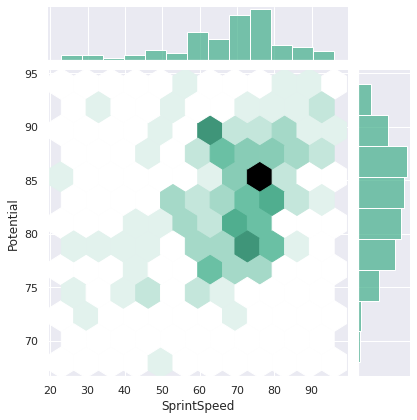

In [23]:
x = filtered_player_df['SprintSpeed']
y = filtered_player_df['Potential']
sns.jointplot(x, y, kind="hex", color="#4CB391")